# 1. Introduction

The aim of this notebook is to understand the process of EDA and Data-preparation, selection of features, implementing machine learning tools. Later, will comparing and improving the best models.

### About Dataset
Dataset:  <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data">Breast Cancer Wisconsin (Diagnostic) Data Set</a>

The features from the data set describe characteristics of the cell nuclei and are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. As described in UCI Machine Learning Repository, the attribute informations are:
 The dataset contains 569 samples of malignant and benign tumor cells.

1. The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.
2. The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.
3. The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

# 2. Problem Identification
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

### Objective
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem.

>Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

<b>Getting Started: Load libraries and set options

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

data = pd.read_csv('../input/data.csv')

['data.csv']


In [2]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

<b>Inspecting Dataset</b>

The “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [3]:
print(f'Dimension of our data {data.shape} \n Data feature informations')
data.info()

Dimension of our data (569, 33) 
 Data feature informations
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se        

Now, will take a look at dataframe we loaded.

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Observation:
1. Here, we have second column <b>"diagnosis"</b>, which is our objective to assert. Also, we will drop the column <b>id</b> since, its no use for us.
2. As can bee seen above, except for the diagnosis (that is M = malignant or B = benign ) all other features are of type float64 and have 0 non-null numbers. 
3. During the data set loading a extra column was created. We will use the code below to delete this entire column. 
4. Our diagnosis is object type i.e. catogorical variable, so, later we'will apply encoding method upon it and convert it to numeric.

In [5]:
data.drop('id',axis=1, inplace=True)
data.drop(data.columns[[-1]], axis = 1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

Now , will take a look on our target variable

In [6]:
print(f' Total data {data.shape[0]} diagnosis.\n Categories: {data.diagnosis.unique()}\n Data value count: \n{data.diagnosis.value_counts()}')

 Total data 569 diagnosis.
 Categories: ['M' 'B']
 Data value count: 
B    357
M    212
Name: diagnosis, dtype: int64


# 3. Exploratory Data Analysis
In this section, we'll explore the attributes and data values. Familiarity with data will provide more insight knowledge for data pre-processing.

## Objectives of Data Exploration
Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set

> Purpose of EDA:
1. Summarize the statistics and visualization of data for better understanding.Crubing indication for tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis.
2. To create overall picture of the data with basic statistical description and aspects, and identify 

Prospectives used to examine the data:
1. Descriptive statistics
2. Visualization

## Descriptive statistics
It is a summary statistic that quantitatively describes or summarizes features of a collection of information, process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation.

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.var()

radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 324167.385102
smoothness_worst

<b>Observation Variance:</b>
    Most of the component have variance near to zero, hence, variable informations are inferior for understanding of the data.

In [9]:
data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

<b>Observation Skewness:</b>  Skewness is the extent to which the data are not symmetrical. Whether the skewness value is 0, positive, or negative reveals information about the shape of the data.
From the data, we can see that most of the components are positively skewed, only.

In [10]:
data.kurtosis()

radius_mean                 0.845522
texture_mean                0.758319
perimeter_mean              0.972214
area_mean                   3.652303
smoothness_mean             0.855975
compactness_mean            1.650130
concavity_mean              1.998638
concave points_mean         1.066556
symmetry_mean               1.287933
fractal_dimension_mean      3.005892
radius_se                  17.686726
texture_se                  5.349169
perimeter_se               21.401905
area_se                    49.209077
smoothness_se              10.469840
compactness_se              5.106252
concavity_se               48.861395
concave points_se           5.126302
symmetry_se                 7.896130
fractal_dimension_se       26.280847
radius_worst                0.944090
texture_worst               0.224302
perimeter_worst             1.070150
area_worst                  4.396395
smoothness_worst            0.517825
compactness_worst           3.039288
concavity_worst             1.615253
c

<b>Observation Kurtosis:</b> Kurtosis indicates how the peak and tails of a distribution differ from the normal distribution(Mesokurtic). Use kurtosis to help you initially understand general characteristics about the distribution of your data. It is a measure of whether the data are heavy-tailed (profusion of outliers) or light-tailed (lack of outliers) relative to a normal distribution.
1. Only, 6 varialbes high on Leptokurtic kind value.
2. Only, 1 feature is Platykurtic kind.


## Visualization
It is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. With a little domain knowledge, data visualizations can be used to express and demonstrate key relationships in plots and charts that are more visceral to yourself and stakeholders than measures of association or significance. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

One of our main goals for visualizing the data here, is to observe which features are most intiutive in predicting malignant or benign cancer. The other, is to draw general trend, may aid us in model selection and hyper parameter selection.

### 1. Univariate
Following are techniques which can be used to understand each attribute of your dataset independently:
1. Histograms.
2. Density Plots.
3. Box Plots.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

<b>We are interested mainly in the mean values of these features, so we will sagregate those features, in order to make work easier and the code more readably.</b>

diagnosis
B    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

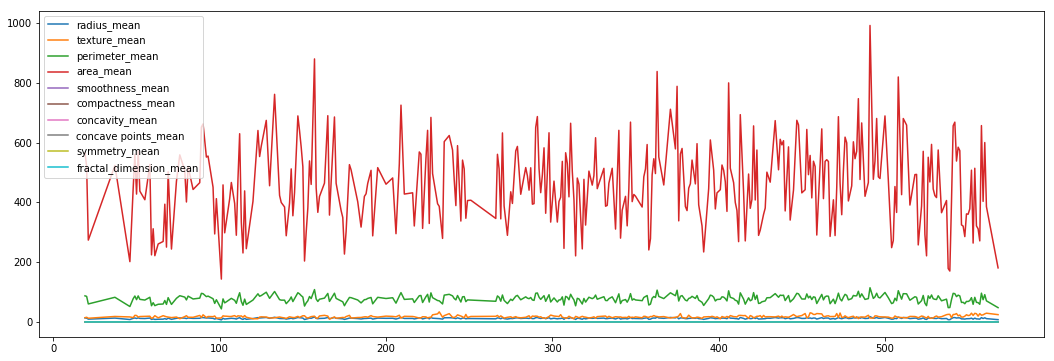

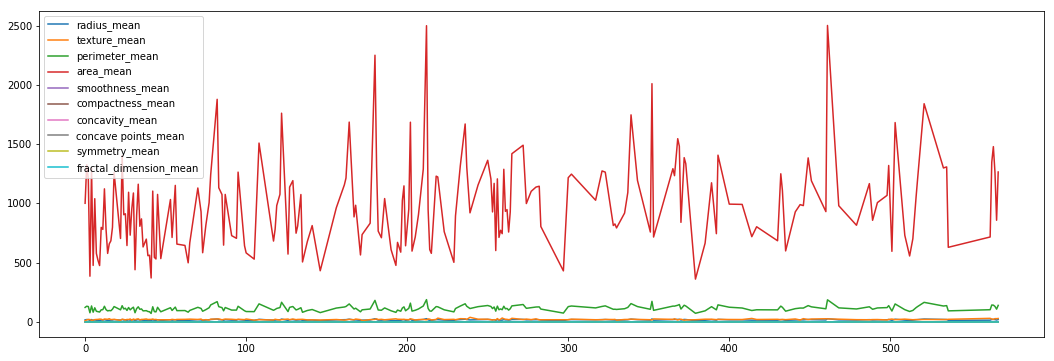

In [12]:
data[[x for x in data.columns if 'mean' in x] + ['diagnosis']].groupby('diagnosis').plot(figsize=(18, 6), label=True)

In [13]:
data_mean = data.iloc[:,1:11]

In [14]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
dtypes: float64(10)
memory usage: 44.5 KB


#### Histogram
A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd36879a278>,
      dtype=object)

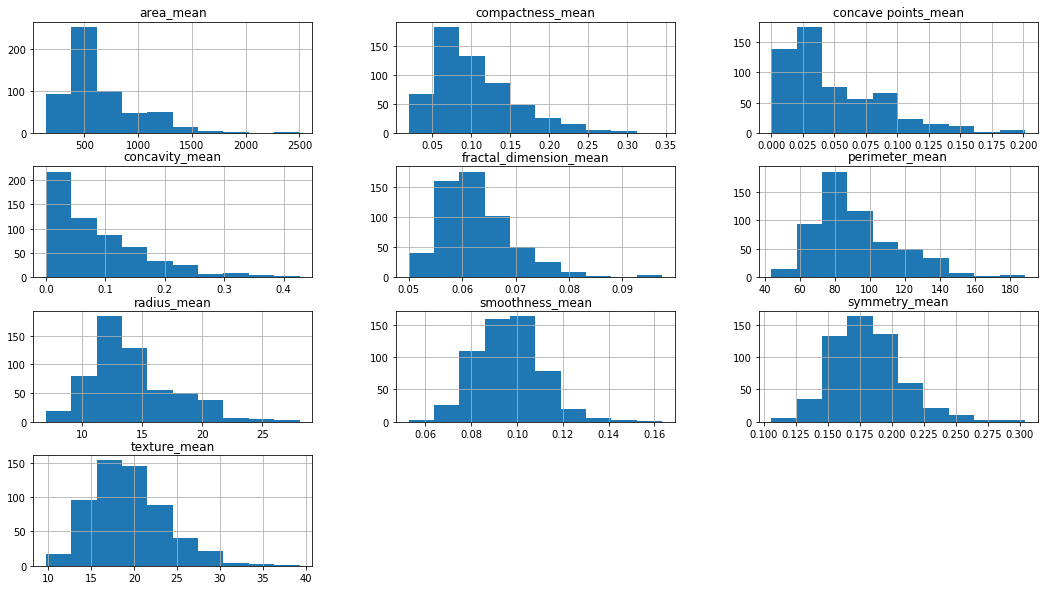

In [15]:
data_mean.hist(bins=10, figsize=(18,10))

/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


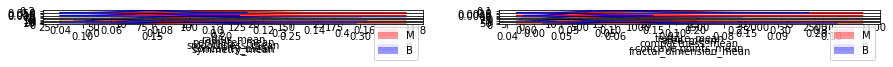

In [16]:

bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(data_mean):
    rows = int(len(data_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### Density

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3689bba20>,
      dtype=object)

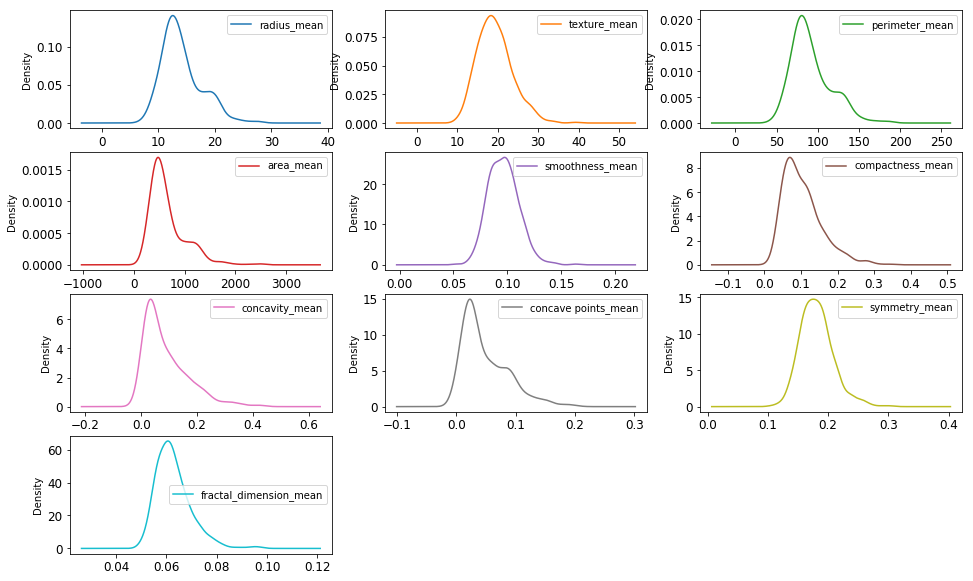

In [17]:
data_mean.plot(kind='density', subplots=True, sharex=False, sharey=False,layout=(4,3),fontsize=12, figsize=(16,10))

#### Boxplot
The box by itself illustrates the interquartile spread of the distribution; its length determined by the  25%(Q1)  and  75%(Q3) percentiles. The vertical line inside the box marks the median ( 50% ) of the distribution.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,"AxesSubplot(0.125,0.71587;0.227941x0.16413)","AxesSubplot(0.398529,0.71587;0.227941x0.16413)","AxesSubplot(0.672059,0.71587;0.227941x0.16413)","AxesSubplot(0.125,0.518913;0.227941x0.16413)","AxesSubplot(0.398529,0.518913;0.227941x0.16413)","AxesSubplot(0.672059,0.518913;0.227941x0.16413)","AxesSubplot(0.125,0.321957;0.227941x0.16413)","AxesSubplot(0.398529,0.321957;0.227941x0.16413)","AxesSubplot(0.672059,0.321957;0.227941x0.16413)","AxesSubplot(0.125,0.125;0.227941x0.16413)"
M,"AxesSubplot(0.125,0.71587;0.227941x0.16413)","AxesSubplot(0.398529,0.71587;0.227941x0.16413)","AxesSubplot(0.672059,0.71587;0.227941x0.16413)","AxesSubplot(0.125,0.518913;0.227941x0.16413)","AxesSubplot(0.398529,0.518913;0.227941x0.16413)","AxesSubplot(0.672059,0.518913;0.227941x0.16413)","AxesSubplot(0.125,0.321957;0.227941x0.16413)","AxesSubplot(0.398529,0.321957;0.227941x0.16413)","AxesSubplot(0.672059,0.321957;0.227941x0.16413)","AxesSubplot(0.125,0.125;0.227941x0.16413)"


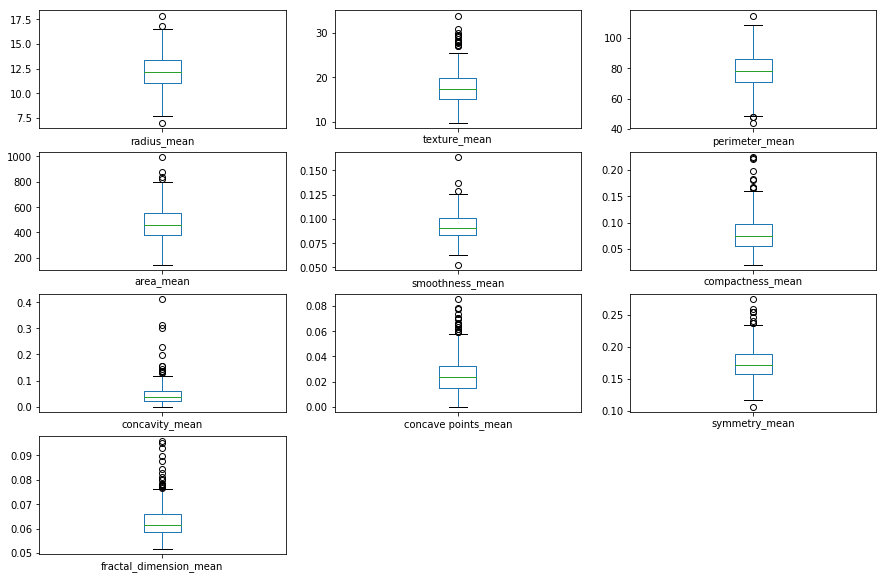

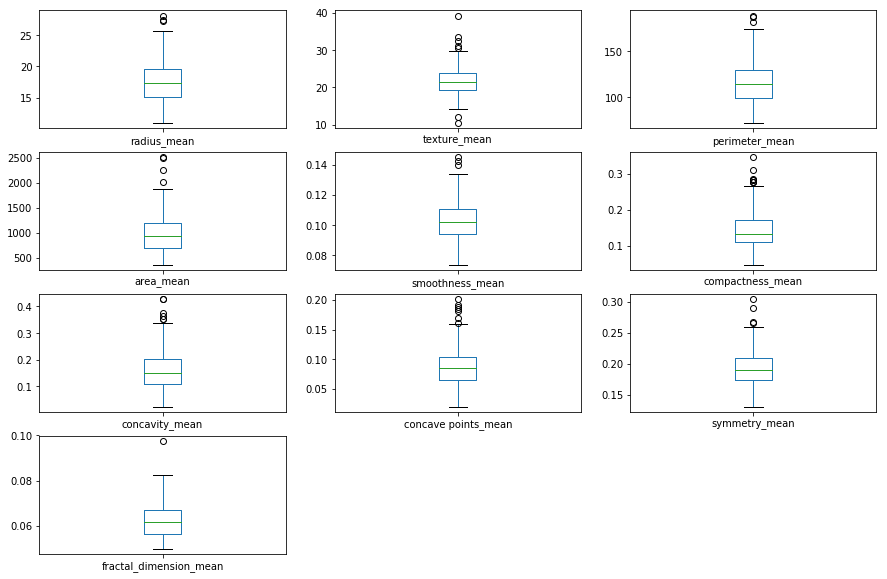

In [18]:
data[[x for x in data.columns if 'mean' in x] + ['diagnosis']].groupby('diagnosis').plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False, sharey=False,figsize=(15,10))

<b>Observation:</b>
We can see that perhaps the attributes concavity,and concavity_point may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

### Multi-variate
1. Scatter plots
2. Correlation matrix

#### Correlation Matrix
First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values:

In [19]:
data_mean.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


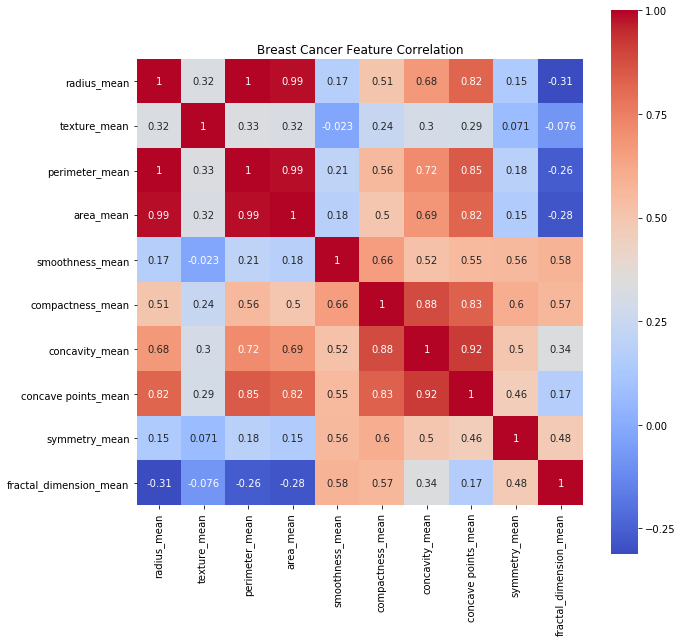

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data_mean.corr(), annot=True, square=True, cmap='coolwarm')
plt.title('Breast Cancer Feature Correlation')
plt.show()

<b>Observations:</b>
We can observe strong positive relationship exists with mean values paramaters between 1-0.75;.

* The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
* Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
* Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

#### Scatter plot

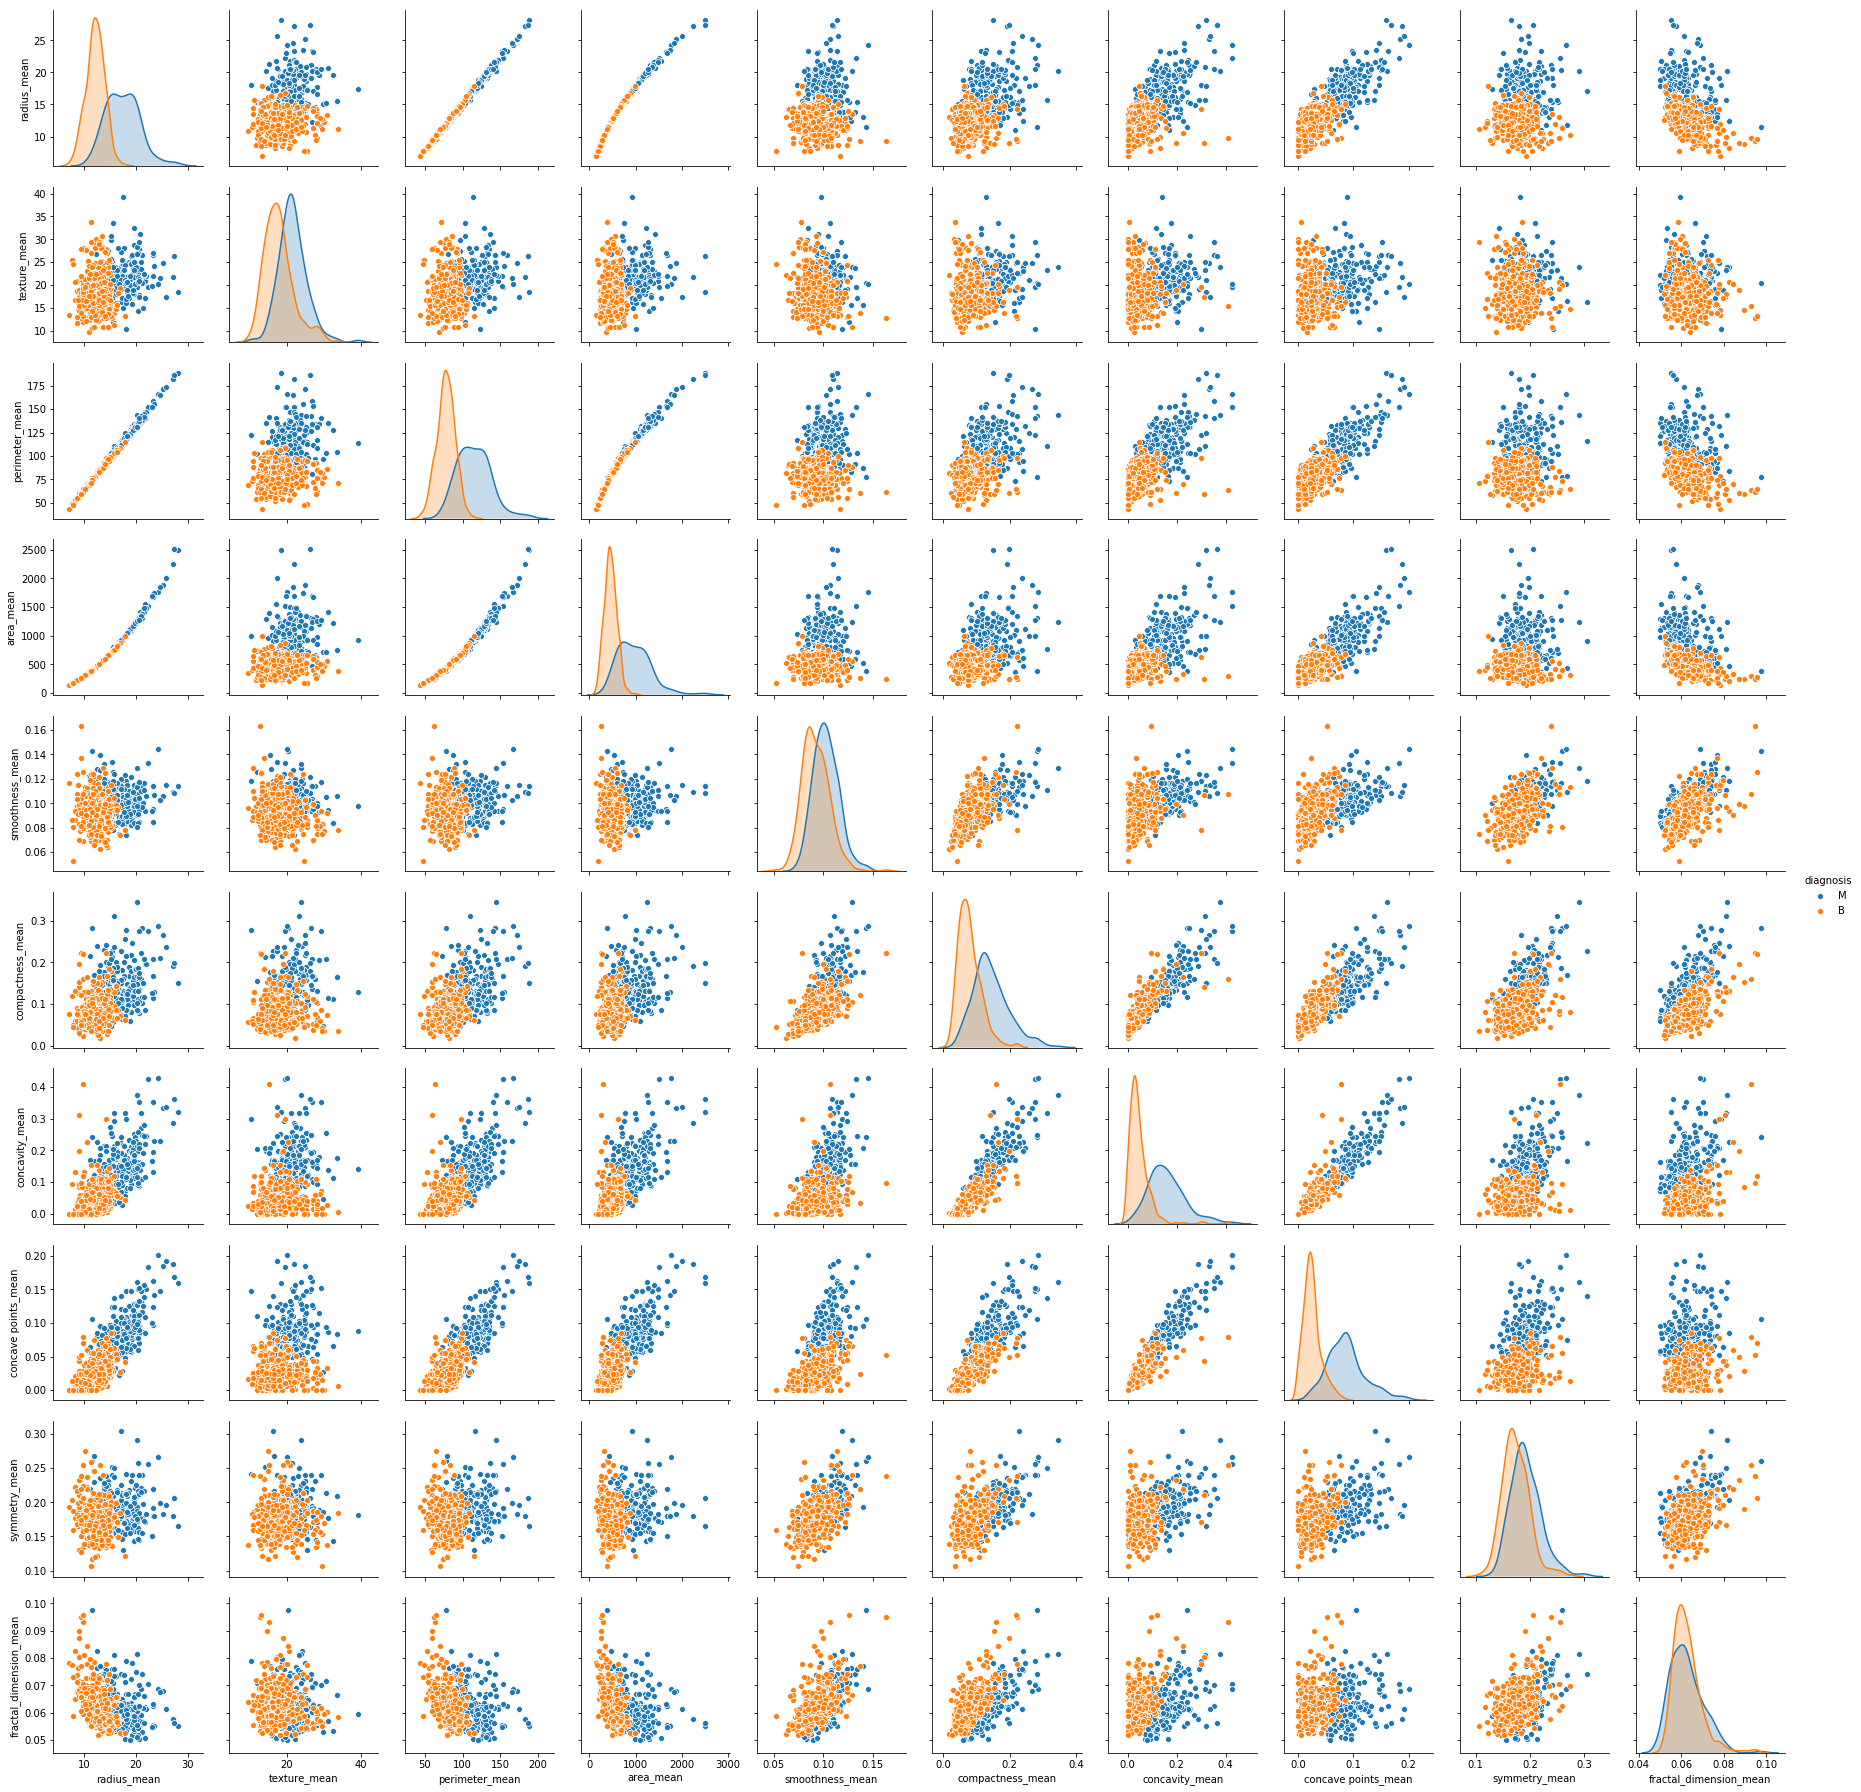

In [21]:
sns.pairplot(data ,hue='diagnosis', vars = data_mean.columns)

<b>Observation:</b>

* Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
* mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

* In any of the histograms there are no noticeable large outliers that warrants further cleanup.

In [22]:
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

# 3. Data Preprocessing
Data preprocessing is a crucial step for any data analysis problem. Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis. It is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

This involves a number of activities such as:
* Assigning numerical values to categorical data;
* Handling missing values; and
* Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

Methods can be used:
* Handling Null Values
* Standardization
* Handling Categorical Variables
* One-Hot Encoding
* Multicollinearity

<B>Activities:</B>
 We already identified some features of interest.Now, we will use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction.

<b>Goal:</b>
 Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model.
 
 ### Handling Categorical Variables 
 Handling categorical variables is another integral aspect of Machine Learning. Categorical variables are basically the variables that are discrete and not continuous.
 
 <b>Categorical variables are further divided into 2 types :</b>
* Ordinal categorical variables — These variables can be ordered. Ex — Size of a T-shirt. We can say that M<L<XL.
* Nominal categorical variables — These variables can’t be ordered. Ex — Color of a T-shirt. We can’t say that Blue<Green as it doesn’t make any sense to compare the colors as they don’t have any relationship.

The biggest mistake that most people make is that they are not able to differentiate between ordinal and nominal CVs.So if you use the same map() function or LabelEncoder with nominal variables then the model will think that there is some sort of relationship between the nominal CVs.
The correct way of handling nominal CVs is to use One-Hot Encoding. The easiest way to use One-Hot Encoding is to use the get_dummies() function.

Since, our diagnosis variable is of nominal i.e. there is no relationship between them, will use get_dummies() with drop_frist=True parameter because we have only two values which is equivalent to use map() i.e. ordinal way of handling values.


In [23]:
diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

#from sklearn.preprocessing import LabelEncoder
#LE = LabelEncoder()
#data['diagnosis'] = LE.fit_transform(data['diagnosis'])

> After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively, illustrated by calling the transform method of LabelEncorder on two dummy variables.

### <b>Assesing Model Accuracy: Split data into training and test sets</b>

Our aim is to construct a "function" y = f(X) such that the value of y (1 or 0) will be determined once we input the values X into f. The "function" f will be construct by the machine learning algorithm based on the ys and Xs that are already known.

<b>Activities:</b>
* Split the available data into a training set and a testing set. (70% training, 30% test)
* Train the algorithm on the first part,
* make predictions on the second part and
* evaluate the predictions against the expected results.

In [24]:
X_feature = data.loc[:,features_selection]
y = data.loc[:,'diagnosis']

#### Feature Standardization
* Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

* As seen in _Exploratory data analysis_ the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.

Let’s evaluate the same algorithms with a standardized copy of the dataset. Here, we use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one.

In [25]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
X = scaler.fit_transform(X_feature)

#### Feature decomposition using Principal Component Analysis ( PCA )

From the pair plot in Visualization, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintian as much information as possible when working with only 2 dimensions. 

In [26]:
# Fisrt we will standardize our data
X_pca = data.iloc[:,1:]
X_pcas = scaler.fit_transform(X_pca)

In [27]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(X_pcas)
X_pca = fit.transform(X_pcas)

In [28]:
fit.explained_variance_ratio_ * 10, fit.components_

(array([4.42720256, 1.8971182 , 0.93931633, 0.66021349, 0.54957685,
        0.4024522 , 0.22507337, 0.15887238, 0.13896494, 0.11689782]),
 array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
          2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
          2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
          6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
          2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
          1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
          4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
          1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
          1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
          2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
        [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
         -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
          6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
          3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
         -8.94572342e

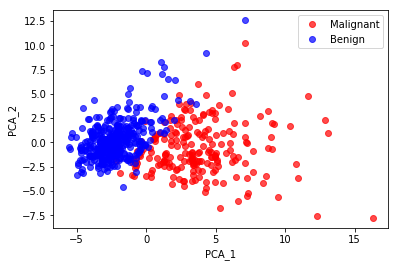

In [29]:
X_pca = pca.transform(X_pcas)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]
# diag_map = {'M':1, 'B':0}
plt.plot(PCA_df['PCA_1'][data.diagnosis == 1],PCA_df['PCA_2'][data.diagnosis == 1],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 0],PCA_df['PCA_2'][data.diagnosis == 0],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are “most spread” along the new feature axes.

#### Deciding How Many Principal Components to Retain

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot.

Using Elbow Method to determine the right number of components to be retain.

In [30]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var,var1)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978] [44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15]


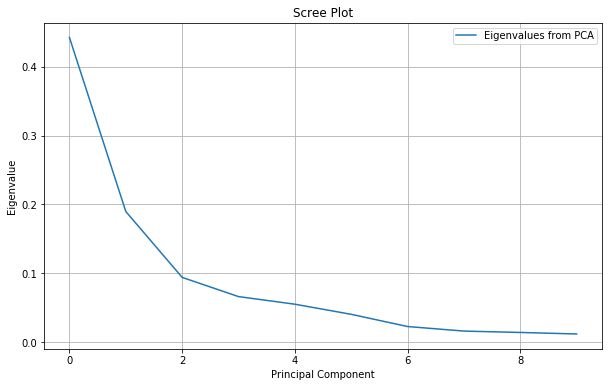

In [31]:
plt.figure(figsize=(10,6))
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
plt.grid(True)
#leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)
plt.show()

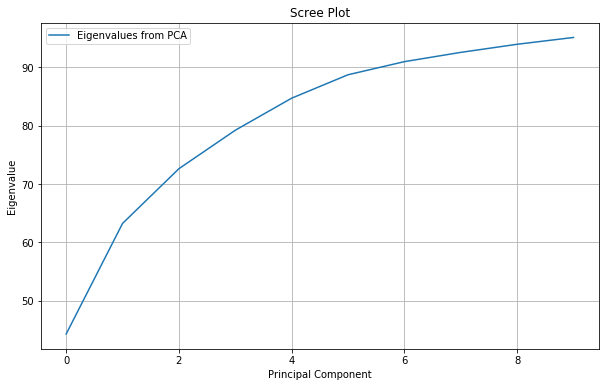

In [32]:
plt.figure(figsize=(10,6))
plt.plot(var1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
plt.grid(True)
#leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)
plt.show()

In [33]:
# Difference in numbers of columns after applying PCA
print("Before          After")
print(X_pcas.shape,'--->', X_pca.shape)

Before          After
(569, 30) ---> (569, 10)


<b>Observation:</b>

The most obvious change in slope in the scree plot occurs at component 2 fig 1, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

#### Creating final dataset after applying PCA

Following is the formula for conversion



<b>Summary of the Data Preprocing Approach used here: </b>

* Assign features to a dataframe X, and transform the class labels from their original string representation (M and B) into integers
* Split data into training and test sets
* Standardize the data.

Again took original data and standardized for applying PCA.
* Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix
* Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤dk≤d).
* Construct the projection matrix W from the selected k eigenvectors.
* Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.

It is common to select a subset of features that have the largest correlation with the class labels. The effect of feature selection must be assessed within a complete modeling pipeline in order to give you an unbiased estimated of your model's true performance. Hence, in the next section I will first introduce cross-validation, before applying the PCA-based feature selection strategy in the model building pipeline.

### New Datasets

Till here, now we have two datas after preprocessing it, first on only selected features, second after applying PCA feature extracion.

# 4. Predictive Modeling

### Classification with cross-validation
The splitting of the data into test and training sets is crucial to avoid overfitting. This allows generalization of real, previously-unseen data. Cross-validation extends this idea further. Instead of having a single train/test split, we specify so-called folds so that the data is divided into similarly-sized folds.

* Training occurs by taking all folds except one – referred to as the holdout sample.
* On the completion of the training, we test the performance of your fitted model using the holdout sample.
* The holdout sample is then thrown back with the rest of the other folds, and a different fold is pulled out as the new holdout sample.
* Training is repeated again with the remaining folds and we measure performance using the holdout sample. This process is repeated until each fold has had a chance to be a test or holdout sample.
* The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample.


This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.

#### Support vector machines
Support vector machines (SVMs) learning algorithm will be used to build the predictive model. SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995)

Kernelized support vector machines are powerful models and perform well on a variety of datasets.

* SVMs allow for complex decision boundaries, even if the data has only a few features.They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples.

* Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.

* SVMs requires careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications.



###### Important Parameters
The important parameters in kernel SVMs are the

* Regularization parameter C,
* The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
* Kernel-specific parameters.
gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [35]:
# Standardized data
# X_pcas and y

#  Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pcas, y, test_size=0.3, random_state=2, stratify=y)

#  Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True, gamma='auto')
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.95



To get a better measure of prediction accuracy (which we can use as a proxy for “goodness of fit” of the model), we can successively split the data into folds that we will use for training and testing:

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

In [37]:

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = list(cross_val_score(SVC(gamma='auto'), X_pcas, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {}'.format(n_folds, cv_error))
print('Average score: {:.2f} %'.format(np.average(cv_error)))


The 3-fold cross-validation accuracy score for this classifier is [0.9631578947368421, 0.9842105263157894, 0.9735449735449735]
Average score: 0.97 %


The above evaluations were based on using the entire set of features. We will now employ the correlation-based feature selection strategy (F- Test) to assess the effect of using 3 features which have the best correlation with the class labels.

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True, gamma='auto'))

scores = cross_val_score(clf2, X_pcas, y, cv=3)
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.93157895 0.95263158 0.94179894]
Average score and uncertainty: (94.20 +- 0.860)%


<b>Observation:</b>

From the above results, we can see that only a fraction of the features are required to build a model that performs similarly to models based on using the entire set of features. Feature selection is an important part of the model-building process that you must always pay particular attention to.

### Model Accuracy

#### Receiver Operating Characteristic (ROC) curve
In statistical modeling and machine learning, a commonly-reported performance measure of model accuracy for binary classification problems is Area Under the Curve (AUC).

To understand what information the ROC curve conveys, consider the so-called confusion matrix that essentially is a two-dimensional table where the classifier model is on one axis (vertical), and ground truth is on the other (horizontal) axis, as shown below. Either of these axes can take two values (as depicted)

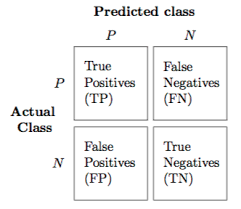

In an ROC curve, we plot “True Positive Rate” on the Y-axis and “False Positive Rate” on the X-axis, where the values “true positive”, “false negative”, “false positive”, and “true negative” are events (or their probabilities) as described above. The rates are defined according to the following:

* True positive rate (or sensitivity)}: tpr = tp / (tp + fn)
* False positive rate: fpr = fp / (fp + tn)
* True negative rate (or specificity): tnr = tn / (fp + tn)

In all definitions, the denominator is a row margin in the above confusion matrix. Thus,one can express

* the true positive rate (tpr) as the probability that the model says "P" when the real value is indeed "P" (i.e., a conditional probability). However, this does not tell you how likely you are to be correct when calling "P" (i.e., the probability of a true positive, conditioned on the test result being "P").

In [39]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred)

col_0,0,1
diagnosis,,
0,106,1
1,7,57


In [40]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



<b>Observation:</b>

* The classifier made a total of 174 predictions (i.e 174 patients were being tested for the presence breast cancer).
* Out of those 174 cases, the classifier predicted "yes" 58 times, and "no" 113 times.
* In reality, 64 patients in the sample have the disease, and 107 patients do not.

#### Rates as computed from the confusion matrix
1. Accuracy: Overall, how often is the classifier correct?
        (TP+TN)/total = (57+106)/171 = 0.95
2. Misclassification Rate: Overall, how often is it wrong?
        (FP+FN)/total = (1+7)/171 = 0.05 equivalent to 1 minus Accuracy also known as "Error Rate"
3. True Positive Rate: When it's actually yes, how often does it predict 1?
        TP/actual yes = 57/64 = 0.89 also known as "Sensitivity" or "Recall"
4. False Positive Rate: When it's actually 0, how often does it predict 1?
        FP/actual no = 1/107 = 0.01
5. Specificity: When it's actually 0, how often does it predict 0? also know as true positive rate
        TN/actual no = 106/107 = 0.99 equivalent to 1 minus False Positive Rate
6. Precision: When it predicts 1, how often is it correct?
        TP/predicted yes = 57/58 = 0.98
7. Prevalence: How often does the yes condition actually occur in our sample?
        actual yes/total = 64/171 = 0.34

Text(0.5, 1.0, 'Receiver operating characteristic example')

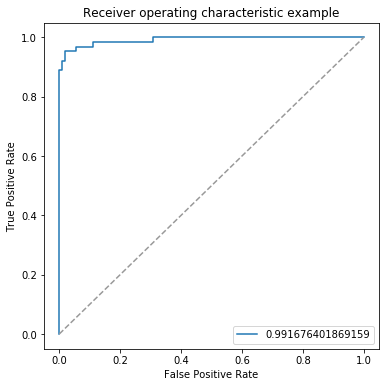

In [41]:

from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
fig, ax = plt.subplots(1,1, figsize=(6,6))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])

ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.legend([auc(fpr,tpr)])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')

* To interpret the ROC correctly, consider what the points that lie along the diagonal represent. For these situations, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply, the classification model is random.

* For the points above the diagonal, tpr > fpr, and the model says that you are in a zone where you are performing better than random. For example, assume tpr = 0.99 and fpr = 0.01, Then, the probability of being in the true positive group is $(0.99 / (0.99 + 0.01)) = 99\%$. Furthermore, holding fpr constant, it is easy to see that the more vertically above the diagonal you are positioned, the better the classification model.

### Optimizing classifier

We can tune two key parameters of the SVM algorithm:

1. The value of C (how much to relax the margin)
2. And the type of kernel.

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

Python scikit-learn have some simple methods for algorithm parameter tuning:

* Grid Search Parameter Tuning.
* Random Search Parameter Tuning.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Here I'm using orinigianl data X
Xs = data.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=147, stratify=y)

# Split-out validation dataset
array = data.values
X = array[:,1:31]
y = array[:,0]

# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


In [44]:
import time


In [45]:
# Train classifiers.
start = time.time()
kernel_values = [ 'linear' , 'poly' ]
param_grid = {'C': np.logspace(-3, 3, 1), 'gamma': np.logspace(-3, 3, 1),'kernel': kernel_values}
# We are using n_flods = 5
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5,verbose=3, n_jobs=1)
grid.fit(X_train, y_train)

print(time.time()-start)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.926, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.925, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.949, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.924, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.975, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.963, total=   7.2s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.912, total=   6.6s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.937, total=   6.7s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.962, total=   8.9s
[CV] C=0.001, gamma=0.001, kernel=poly ...............................
[CV] ... C=0.001, gamma=0.001, kernel=poly, score=0.949, total=   5.5s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   35.0s finished


40.833199977874756


### Execute of next cell will take too much time.

In [46]:
# Train classifiers.
#start = time.time()
#kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
#param_grid = {'C': np.logspace(-3, 3, 3), 'gamma': np.logspace(-3, 3, 3),'kernel': kernel_values}
# We are using n_flods = 5
#grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5,verbose=3, n_jobs=1)
#grid.fit(X_train, y_train)
print(time.time()-start)

40.84884071350098


In [47]:
#print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))
#clf = grid.best_estimator_

In [48]:
#y_pred = clf.fit(X_train, y_train).predict(X_test)

#print(classification_report(y_test, y_pred))

In [49]:
#pd.crosstab(y_test, y_pred)

#### Decision boundaries of different classifiers

Let's take a look at the decision boundaries produced by the linear, Gaussian and polynomial classifiers.

In [50]:
Xtrain = X_train[:, :2] # we only take the first two features to visualize in 2D graph.

# We create an instance of SVM and fit out data. 
# We do not scale our data since we want to plot the support vectors


C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
 # create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

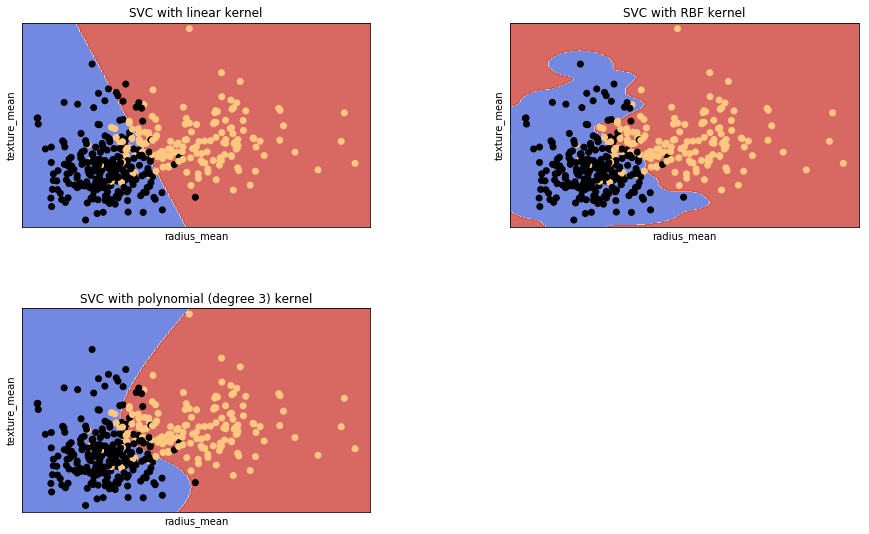

In [52]:
plt.rcParams['figure.figsize'] = (15, 9) 
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.copper)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


#### Conclusion
This work demonstrates the modelling of breast cancer as classification task using Support Vector Machine.

The SVM performs better when the dataset is standardized so that all attributes have a mean value of zero and a standard deviation of one. We can calculate this from the entire training dataset and apply the same transform to the input attributes from the validation dataset.

Next Task:

Summarizing the conclusion of findings
Compare with other classification methods
Decision trees with tree.DecisionTreeClassifier();
K-nearest neighbors with neighbors.KNeighborsClassifier();
Random forests with ensemble.RandomForestClassifier();

# 5. Automate the ML process using pipelines
There are standard workflows in a machine learning project that can be automated. In Python scikit-learn, Pipelines help to clearly define and automate these workflows.

* Pipelines help overcome common problems like data leakage in your test harness.
* Python scikit-learn provides a Pipeline utility to help automate machine learning workflows.
* Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

## Data Preparation and Modeling Pipeline

Now, it is time to create some models of the data and estimate their accuracy on unseen data. 

Activities:
* Separate out a validation dataset.
* Setup the test harness to use 10-fold cross validation. 
* Build 4 different models
* Select the best model

#### Evaluate Algorithms: Baseline

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold

In [54]:
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression(solver='liblinear')))
models.append(( 'KNN' , KNeighborsClassifier(n_neighbors=5)))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC(gamma='auto')))

# Test options and evaluation metric
num_folds = 10

seed = 147 
scoring =  'accuracy'


results = []
names = []
for name, model in models:
 kfold = KFold( n_splits=num_folds, random_state=seed)
 cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
print('-> 10-Fold cross-validation accurcay score for the training data for six classifiers')

LR: 0.944808 (0.029070)
KNN: 0.929872 (0.036675)
CART: 0.909551 (0.045146)
NB: 0.934679 (0.044038)
SVM: 0.605769 (0.073092)
-> 10-Fold cross-validation accurcay score for the training data for six classifiers


<b>Observation: </b>
> The results suggest that both Logistic Regression, KNN  may be worth further study. These are just mean accuracy values. It is always wise to look at the distribution of accuracy values calculated across cross validation folds. We can do that graphically using box and whisker plots.

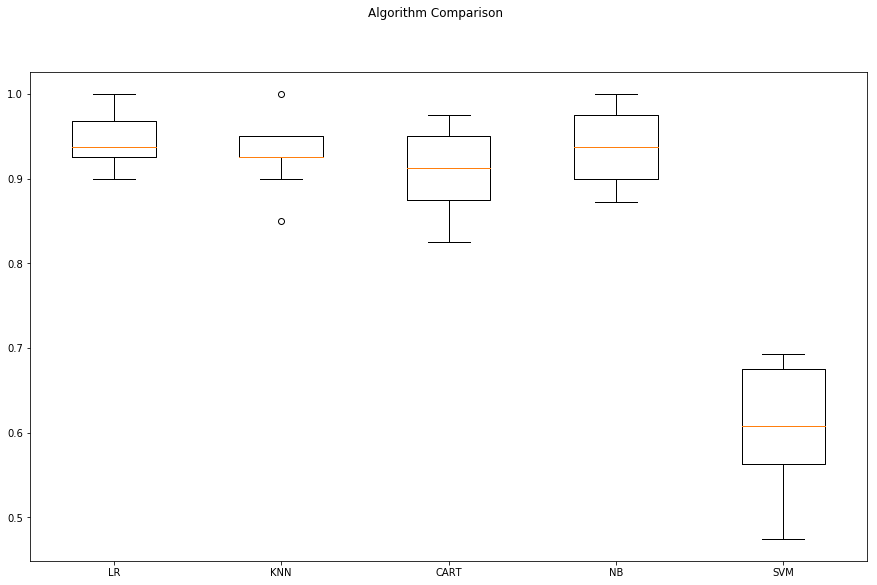

In [55]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<b>Observation: </b>

> The results show a similar tight distribution for all classifiers except SVM which is encouraging, suggesting low variance. The poor results for SVM are surprising.

It is possible the varied distribution of the attributes may have an effect on the accuracy of algorithms such as SVM. In the next section we will repeat this spot-check with a standardized copy of the training dataset.

#### Evaluate Algorithms: Standardize Data

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
# Standardize the dataset
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LogisticRegression())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))

results = []
names = []
for name, model in pipelines:
  kfold = KFold( n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

ScaledLR: 0.972372 (0.034455)
ScaledKNN: 0.947308 (0.044048)
ScaledCART: 0.922115 (0.050802)
ScaledNB: 0.934679 (0.041102)
ScaledSVM: 0.964872 (0.032078)


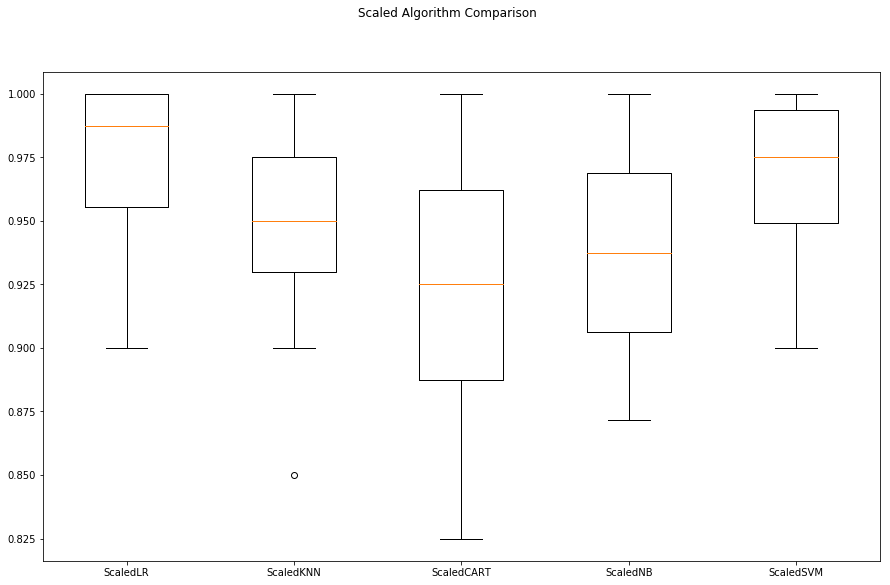

In [58]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<b>Observation: </b>

>The results show that standardization of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.

The results suggest digging deeper into the SVM and KNN and LR algorithms. It is very likely that configuration beyond the default may yield even more accurate models.

# 6. Algorithm Tuning
In this section we investigate tuning the parameters for three algorithms that show promise from the spot-checking in the previous section: LR, KNN and SVM.

### Tuning hyper-parameters - SVC estimator


In [59]:
#Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train, y_train)

#print('--> Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]
gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=1,verbose=3)
gs_svc = gs_svc.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

--> Model Training Accuracy: 0.925 +/- 0.041
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] clf__C=0.0001, clf__kernel=linear ...............................
[CV] ... clf__C=0.0001, clf__kernel=linear, score=0.634, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=linear ...............................
[CV] ... clf__C=0.0001, clf__kernel=linear, score=0.600, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=linear ...............................
[CV] ... clf__C=0.0001, clf__kernel=linear, score=0.625, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=linear ...............................
[CV] ... clf__C=0.0001, clf__kernel=linear, score=0.625, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=linear ...............................
[CV] ... clf__C=0.0001, clf__kernel=linear, score=0.600, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=linear ...............................
[CV] ... clf__C=0.0001, clf__kernel=linear, score=0.625, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=linear .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... clf__C=0.001, clf__kernel=linear, score=0.949, total=   0.0s
[CV] clf__C=0.001, clf__kernel=linear ................................
[CV] .... clf__C=0.001, clf__kernel=linear, score=0.872, total=   0.0s
[CV] clf__C=0.01, clf__kernel=linear .................................
[CV] ..... clf__C=0.01, clf__kernel=linear, score=0.976, total=   0.0s
[CV] clf__C=0.01, clf__kernel=linear .................................
[CV] ..... clf__C=0.01, clf__kernel=linear, score=0.975, total=   0.0s
[CV] clf__C=0.01, clf__kernel=linear .................................
[CV] ..... clf__C=0.01, clf__kernel=linear, score=0.900, total=   0.0s
[CV] clf__C=0.01, clf__kernel=linear .................................
[CV] ..... clf__C=0.01, clf__kernel=linear, score=0.875, total=   0.0s
[CV] clf__C=0.01, clf__kernel=linear .................................
[CV] ..... clf__C=0.01, clf__kernel=linear, score=0.925, total=   0.0s
[CV] clf__C=0.01, clf__kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   23.8s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [60]:

print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
print('--> Best Parameters: \n',gs_svc.best_params_)

--> Tuned Parameters Best Score:  0.9447236180904522
--> Best Parameters: 
 {'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


### Tuning the hyper-parameters - k-NN hyperparameters
For a standard k-NN implementation, there are two primary hyperparameters that you’ll want to tune:

* The number of neighbors k.
* The distance metric/similarity function.

Both of these values can dramatically affect the accuracy of your k-NN classifier. Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times Each time, the n_neighbors parameter should be given a different value from the list We can't give GridSearchCV just a list We've to specify n_neighbors should take on 1 through 30 You can set n_jobs = -1 to run computations in parallel

In [61]:
from sklearn.neighbors import KNeighborsClassifier as KNN

pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier())])
            
#Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train) 

scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=1)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = range(1, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# instantiate the grid
grid = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy')
gs_knn = grid.fit(X_train, y_train)

--> Model Training Accuracy: 0.927 +/- 0.045


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:

print('--> Tuned Parameters Best Score: ',gs_knn.best_score_)
print('--> Best Parameters: \n',gs_knn.best_params_)

--> Tuned Parameters Best Score:  0.9396984924623115
--> Best Parameters: 
 {'clf__n_neighbors': 19}


### Tuning the hyper-parameters - Logistic Regressor hyperparameters

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

For a standard Logistic Regression implementation, there are two primary hyperparameters that you’ll want to tune:

* The value of C.
* The penalty  l1 or l2 (lasso or ridge respectively).

In [63]:

pipe_lr = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', LogisticRegression())])
            
#Fit Pipeline to training Data
pipe_lr.fit(X_train, y_train) 

scores = cross_val_score(estimator=pipe_lr, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=1)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_grid={"clf__C":np.logspace(-3,3,7), "clf__penalty":["l1","l2"]}# l1 lasso l2 ridge

# instantiate the grid
grid = GridSearchCV(estimator=pipe_lr, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy')
gs_lr = grid.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

--> Model Training Accuracy: 0.937 +/- 0.043


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [64]:

print('--> Tuned Parameters Best Score: ',gs_lr.best_score_)
print('--> Best Parameters: \n',gs_lr.best_params_)

--> Tuned Parameters Best Score:  0.9447236180904522
--> Best Parameters: 
 {'clf__C': 0.1, 'clf__penalty': 'l1'}


# 7. Finalize Model

In [65]:
#Use best parameters
clf_svc = gs_svc.best_estimator_

#Get Final Scores
clf_svc.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % clf_svc.score(X_test,y_test))

--> Final Model Training Accuracy: 0.944 +/- 0.032
--> Final Accuracy on Test set: 0.94737


In [66]:
from sklearn.metrics import accuracy_score

clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       116
         1.0       0.94      0.89      0.92        55

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



In [67]:
pd.crosstab(y_test, y_pred)

col_0,0.0,1.0
row_0,,
0.0,113,3
1.0,6,49


## Summary
Worked on a classification predictive modeling machine learning problem, end-to-end using Python. 
Specifically, the steps covered were:

* Problem Definition (Breast Cancer data).
* Loading the Dataset.
* Exploration, Analyze Data (same scale but di↵erent distributions of data).
* Data Processing (PCA and Corss-val)
* Evaluate Algorithms : Baseline (LR looked good).
* Evaluate Algorithms with Standardization (LR and SVM looked good).
* Algorithm Tuning (K=19 for KNN was good, SVM with an RBF kernel and C=100, LR with penalty l1 (laaso) and C= 0.1 was best)..
* Finalize Model (use all training data and confirm using validation dataset)